In [11]:
from PIL import Image
import numpy as np
from Unet_Application_to_Saturn_Kilometric_Radiation.Scripts.read_config import config 
from Unet_Application_to_Saturn_Kilometric_Radiation.Scripts.train_model import load_ids
from utils import DataGen
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import plotly.express as px 
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'


In [2]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 384
TRAIN_PATH = os.path.join(config.output_data_fp, 'train')

total_ids = load_ids(TRAIN_PATH, 3000)

Loaded 1533 IDs from c:\Code\Image_dimension_reduction\data\output_data\train


In [3]:
datagen = DataGen(total_ids, TRAIN_PATH, len(total_ids), IMAGE_WIDTH, IMAGE_HEIGHT)
data, labels = datagen.__getitem__(0) 

In [4]:
labels = [arr.item() for arr in labels]

In [5]:
# Apply PCA
pca = PCA(n_components=4)  # Set the number of principal components
principal_components = pca.fit_transform(data)

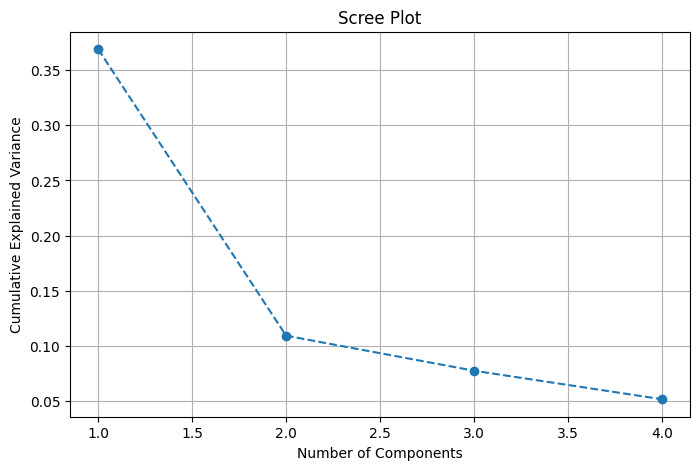

In [6]:
# Assuming pca is your PCA object
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [12]:
colormap = plt.cm.tab20

# Normalize the colormap
norm = mcolors.Normalize(vmin=0, vmax=len(np.unique(labels)))

# Create a color map for Plotly
color_map = {label: mcolors.to_hex(colormap(norm(i))) for i, label in enumerate(np.unique(labels))}

# Convert labels to corresponding colors
colors = [color_map[label] for label in labels]

In [14]:
df = pd.DataFrame(principal_components, columns=['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4'])
df['Label'] = labels

# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x='PCA 1', y='PCA 2', color='Label',
                 color_discrete_map=color_map,  # Use the color map
                 labels={'Label': 'Categories'},
                 title='Interactive PCA Plot')

# Show the plot
fig.show()

C:\Users\beth\AppData\Local\Temp\ipykernel_14436\3361539196.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principal_components[:, 0], principal_components[:, 1], c=colors, cmap='viridis', alpha=0.7)


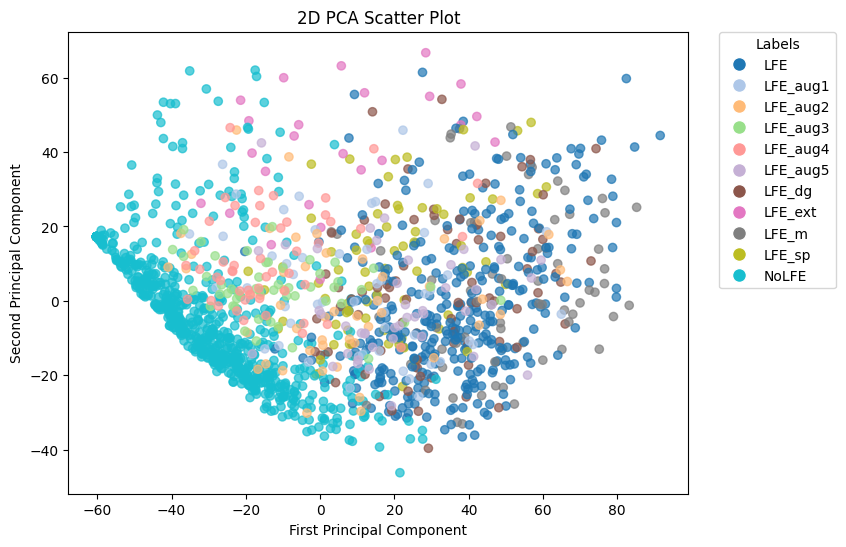

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=colors, cmap='viridis', alpha=0.7)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[label], markersize=10, label=label) for label in unique_labels]
# Add legend outside the plot
plt.legend(handles=handles, title="Labels", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA Scatter Plot')

plt.show()
